<a href="https://colab.research.google.com/github/Rudrajit12/EDA_Capstone_Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **1. Load the dataset and understand the variables present in the dataset**

In [59]:
# Loading and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [13,9]
sns.set(rc={'figure.figsize':(13,9)})

In [60]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [61]:
# Loading the data
bnb_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Data Science/Module 1/EDA Project/Airbnb NYC 2019.csv')
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [62]:
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## **Data Summary:**


* **id**: An unique id for the airbnb listing (numeric)
* **name**: Name of the airbnb listed property (categorical)
* **host_id**: An unique id for the host of the property (numeric)
* **host_name**: Name of the host of the property (categorical)
* **neighbourhood_group**: A group which consists of many neighbourhoods (categorical)
* **neighbourhood**: Nearby properties of the place (categorical)
* **latitude**: latitude coordinates
* **longitude**: longitude coordinates
* **room_type**: Type of a room in the listed property (categorical)
* **price**: Cost of stay (numeric)
* **minimum_nights**: Minimum number of nights a person has to pay for (numeric)
* **number_of_reviews**: Reviews given to the property and host (numeric)
* **last_review**: Last review given (datetime)
* **reviews_per_month**: Average reviews over a month (numeric)
* **calculated_host_listings_count**: How many listings a particular host has (numeric)
* **availability_365**: Availability of the property out of 365 days (numeric)


In [63]:
# check the data types of the variables
bnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [64]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [65]:
# how many records present in the dataset?
len(bnb_df)

48895

## **2. Check for duplicates and missing values in the dataset**

In [66]:
# check for duplicates present in the dataset
bnb_df.duplicated().sum()

0

In [67]:
# check for missing values present in the dataset
bnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We have 4 columns in which there are missing values present. 

The columns: id, name and last_review are irrelevant for our analysis and hence we can drop these columns.

## **3. Missing value treatment**

*   Drop the irrelevant columns
*   Replace NaN values with 0 for the column (reviews_per_month)





In [68]:
# drop the unnecessary columns from the dataframe
bnb_df.drop(['id','name','last_review'], axis=1, inplace=True)
bnb_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [69]:
# replace all NaN values in 'reviews_per_month' by 0
bnb_df.reviews_per_month.fillna(0, inplace=True)
bnb_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [70]:
# replace all NaN values in host_name by 'no name'
bnb_df.host_name.fillna('No Name', inplace=True)
bnb_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [71]:
# check for any missing value
bnb_df.isnull().any()

host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [72]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48895 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

Duplicates and missing values have been removed from the dataset. The dataset now is clean and ready for data exploration/analysis.

In [73]:
# description of the clean dataset
bnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We can see that there are few properties which have listed price as 0. This might be due to some error in data collection as we expect nobody is giving Airbnb stays for free. We will exclude the price 0 for our analysis.

In [74]:
# exclude the records which have price as zero
bnb_df = bnb_df.loc[bnb_df['price'] > 0]

In [75]:
# check the description
bnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The price seems alright now. Though the maximum price is at 10000 $, we will consider it as a natural observation and not an outlier. There are few high values for minimum nights spent and as a reason the price might be higher for those stays.

## **4. Data Exploration or Analysis**

*   The dataset is now ready to be explored.
*   We will uncover few insights from the dataset like:
    * Which hosts has got the most listings?
    * Which hosts are the busiest?
    * Which neighbourhood group has the most listings?
    * Which neighbourhood group and neighbourhood are the most expensive and most affordable?
    * Different room types available in neighbourhood groups.
    * Which neighbourhood group or neighbourhood is more available?
    * Cost of each room type present in NYC.

    and many more.
    



### **What is range of prices of the Airbnb listings in NYC?**

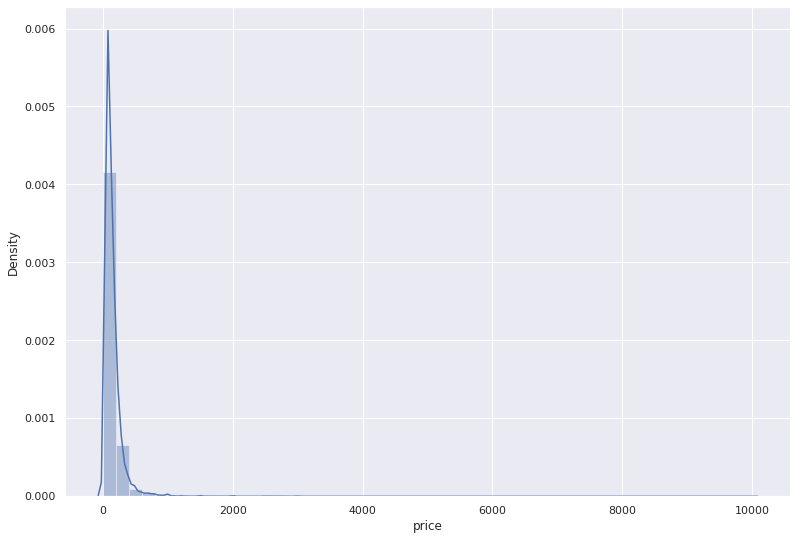

In [76]:
# check the distribution of price
sns.distplot(bnb_df['price'])

* The price column is heavily skewed with most of the price in between 10 to 200 $.

* There are few observations where the minimum nights is very high and thus for those very few observations the price could go high upto 10000 $. Thus, they aren't considered as outliers here.

## **<u>Let us find some insights about the Airbnb Hosts in NYC</u>:**

### **How many Airbnb hosts are there in NYC?**

In [77]:
# find unique hosts
bnb_df[['host_id']].nunique()

host_id    37455
dtype: int64

There are 37455 unique Airbnb hosts in New York City.

### **Which hosts has the most listings in Airbnb NYC?**

host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 121
137358866  Kazuya               103
16098958   Jeremy & Laura        96
12243051   Sonder                96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
7503643    Vida                  52
Name: host_id, dtype: int64


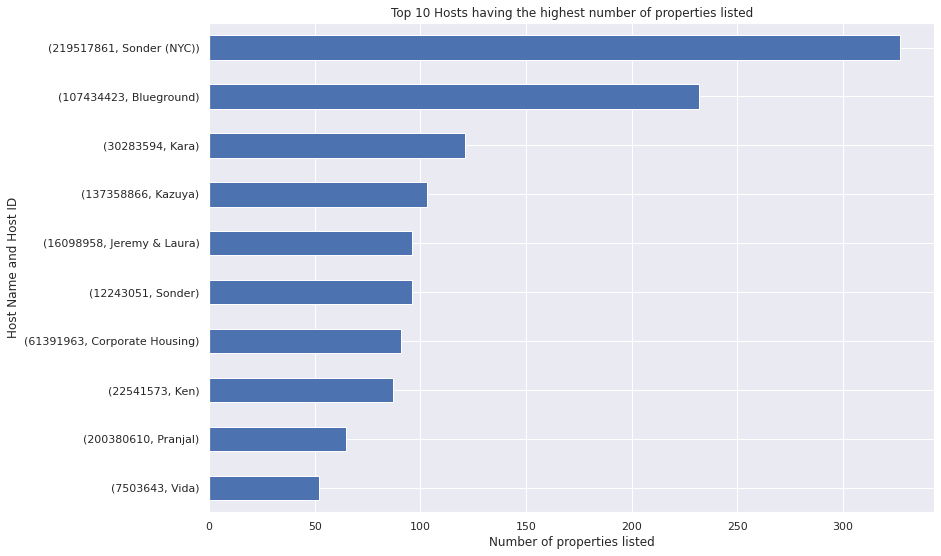

In [81]:
# top 10 hosts on the basis of count of listings
top_hosts_listings = bnb_df.groupby(['host_id','host_name'])['host_id'].count().sort_values(ascending=False)[:10]
print(top_hosts_listings)

# plot the top 10 hosts on the basis of count of listings
top_hosts_listings.plot.barh().invert_yaxis()
plt.xlabel('Number of properties listed')
plt.ylabel('Host Name and Host ID')
plt.title('Top 10 Hosts having the highest number of properties listed')
plt.show()

* We can see from the above plot that Sonder (NYC) has the highest number of properties listed in Airbnb NYC. 

We will see later that whether his/her properties are the most preferred or not.

### **Which hosts has got the most average reviews?**

host_id   host_name     
47621202  Dona              602.500000
4734398   Jj                599.333333
2369681   Carol             540.000000
12949460  Asa               488.000000
792159    Wanda             480.000000
37312959  Maya              454.600000
2321321   Lloyd             454.000000
277379    Agnes             448.500000
307962    Dennis & Naoko    441.000000
97086824  Miss Dy           434.000000
Name: number_of_reviews, dtype: float64


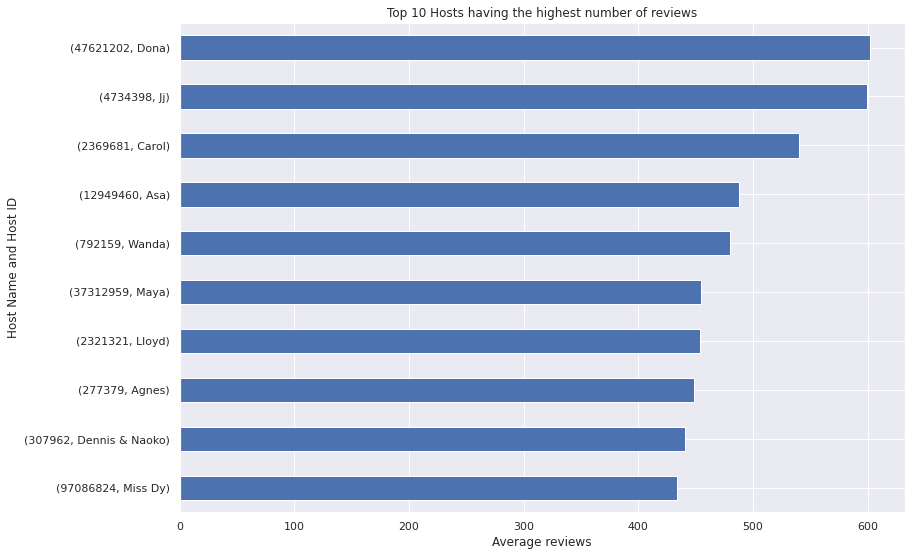

In [82]:
# top 10 hosts on the basis of reviews
top_hosts_reviews = bnb_df.groupby(['host_id','host_name'])['number_of_reviews'].mean().sort_values(ascending=False)[:10]
print(top_hosts_reviews)

# plot the top 10 hosts on the basis of reviews
top_hosts_reviews.plot.barh().invert_yaxis()
plt.ylabel('Host Name and Host ID')
plt.xlabel('Average reviews')
plt.title('Top 10 Hosts having the highest number of reviews')
plt.show()

**From this plot**, 
* We can see clearly that Sonder (NYC) is nowhere among the top 10 hosts who has received the most reviews.
* Thus Sonder (NYC) might have the most properties listed but isn't the most visited ones as per the information we get from average number of reviews.
* Host Dona is clearly the winner here, who has got the most number of reviews in average (602.5).
* As host Dona receives more number of reviews it is natural that she gets more customers as compared to others. 

**Hence host Dona looks to be the busiest of all**.

### **Which hosts has got the highest average reviews per month?**

host_id    host_name
228415932  Louann       20.940000
156684502  Nalicia      18.126667
217379941  Brent        15.780000
47621202   Dona         13.990000
26432133   Danielle     13.604000
256290334  Aisling      13.420000
257832461  Stephanie    13.330000
111841534  Malini       13.150000
27287203   Ben          13.130000
222098649  Melissa      13.110000
Name: reviews_per_month, dtype: float64


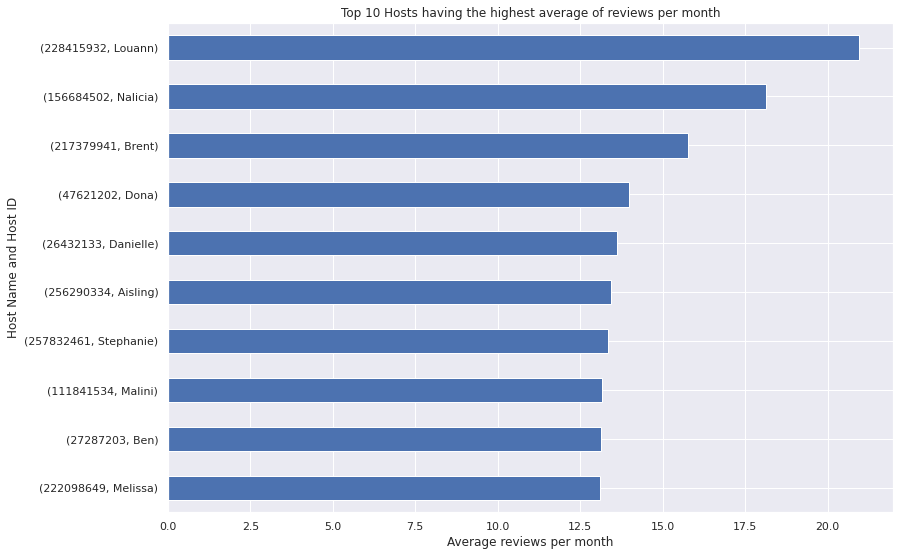

In [83]:
# top 10 hosts on the basis of reviews per month
top_10_monthly_reviews_hosts = bnb_df.groupby(['host_id','host_name'])['reviews_per_month'].mean().sort_values(ascending=False)[:10]
print(top_10_monthly_reviews_hosts)

# plot the top 10 hosts on the basis of reviews per month
top_10_monthly_reviews_hosts.plot.barh().invert_yaxis()
plt.ylabel('Host Name and Host ID')
plt.xlabel('Average reviews per month')
plt.title('Top 10 Hosts having the highest average of reviews per month')
plt.show()

* The plot above shows that Louann receives 20.94 reviews approximately every month which stands out to be the highest among all other hosts in NYC.
* We can infer from this that Louann receives more number of customers who prefer short stays in a month.

* Host Dona even has got 13.99 reviews per month on an average which shows she gets a healthy number of customers monthly. Along with the most number of reviews she has got, proves that she indeed is the most busiest host in NYC.

In [89]:
# let us check the property details of Host Dona
bnb_df[bnb_df['host_name'] == 'Dona']

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
13495,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173


* From the dataframe above we can see that Host Dona has two properties listed in the same neighborhood and the reason for having the more customers could be 

  * price: which is very reasonable as compared to many others
  * min nights: condition for minimum nights to stay is only 1 which is way less than others. People coming for short trips will prefer her property to stay.
  * availability: quite a healthy number of days she is available
  * reviews: number of reviews is very high which will help customers in deciding to book her property

### **Which hosts are more occupied or less available out of 365 days?** 

In [90]:
# top 10 hosts on the basis of least availability
occupied_hosts = bnb_df.groupby(['host_id','host_name'])['availability_365'].mean().sort_values(ascending=True)
print(occupied_hosts)

host_id    host_name       
2438       Tasos                 0.0
10264372   Tyrell                0.0
10264377   Anthony               0.0
41757762   Sara                  0.0
41743945   George - Francis      0.0
                               ...  
17550546   Genevieve           365.0
198328249  Hiram               365.0
88827816   Ziva                365.0
223248121  Julia               365.0
24954668   Sophie              365.0
Name: availability_365, Length: 37455, dtype: float64


* We can see that there are few hosts who aren't even available for a day.

* Tasos, Tyrell, Anthony are a few to name and it is clear that reviews aren't related to availability as we can see that there are no hosts with the most reviews being occupied the whole year.

* Thus we can infer that reviews or reviews per month isn't a strong criteria for people to decide which Airbnb to book or stay in. There can be other factors like location, price etc.

## **<u>Now, let us check some insights about the Neighborhood groups and Neighborhoods in NYC:</u>**

### **Which neighbourhood group has the most number of properties listed?**

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64


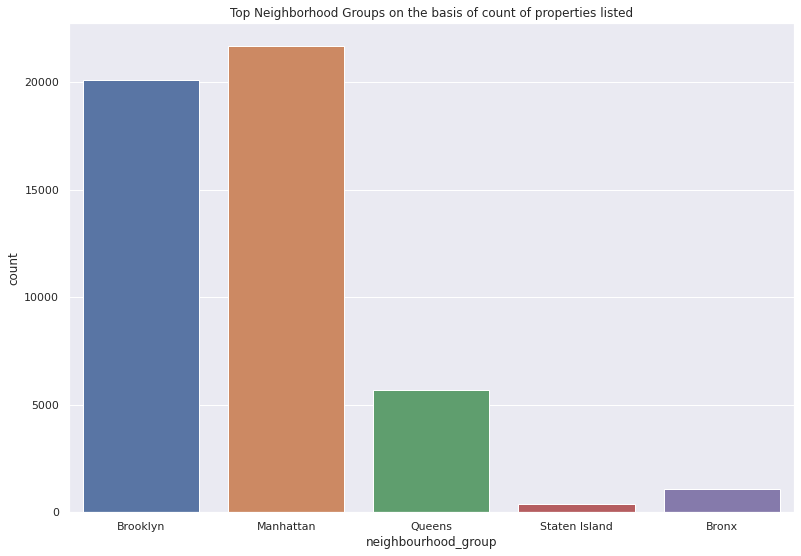

In [91]:
# top neighbourhood groups on the basis of count of properties
top_neighbourhood_groups = bnb_df['neighbourhood_group'].value_counts()
print(top_neighbourhood_groups)

# plot the top neighbourhood groups with the count of properties
plt.title('Top Neighborhood Groups on the basis of count of properties listed')
sns.countplot(bnb_df['neighbourhood_group'])
plt.show()

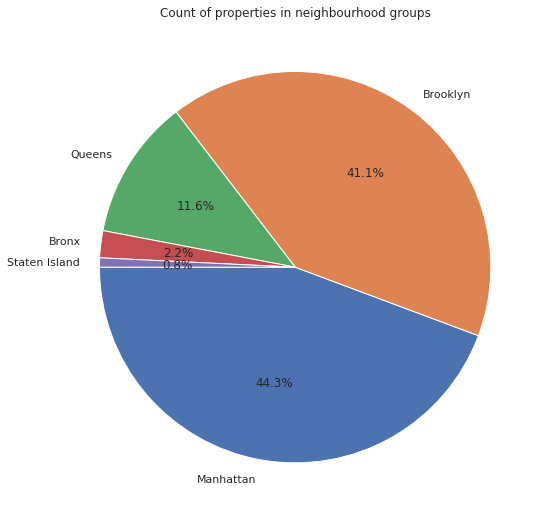

In [92]:
# visualizing the neighbourhood group through a pie chart
plt.figure()
plt.title('Count of properties in neighbourhood groups')
plt.pie(bnb_df['neighbourhood_group'].value_counts(), labels=bnb_df['neighbourhood_group'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

* We can see that Manhattan (21660) and Brooklyn (20095) Neighbourhood Group has the most number of properties listed in Airbnb NYC according to the above plots.

* Staten Island (373) has the least number of properties listed in Airbnb NYC.

### **Which neighbourhood group in NYC is the most expensive and the most affordable?**

neighbourhood_group
Manhattan        196.884903
Brooklyn         124.438915
Staten Island    114.812332
Queens            99.517649
Bronx             87.577064
Name: price, dtype: float64


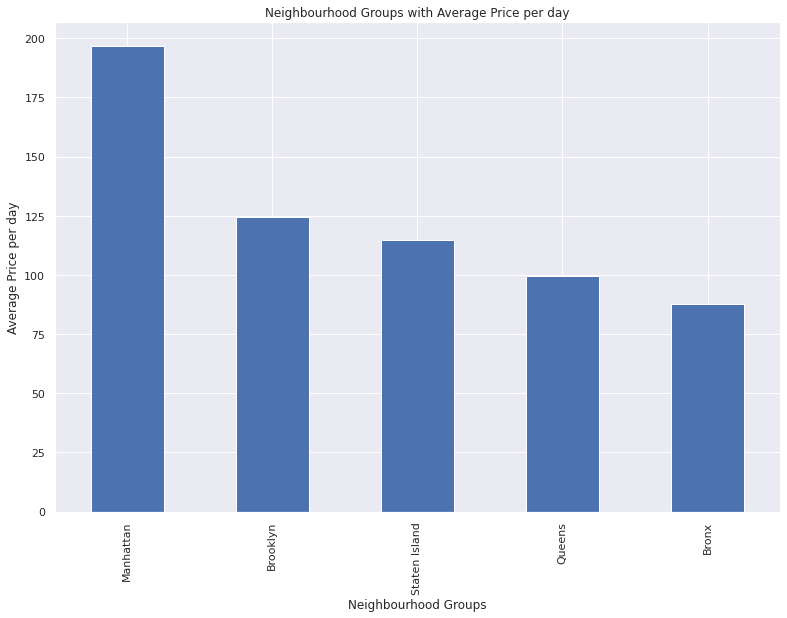

In [97]:
# top neighbourhood groups with higher average prices per day
price_neighbourhood_groups = bnb_df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)
print(price_neighbourhood_groups)

# plot the higher priced neighbourhood groups
price_neighbourhood_groups.plot.bar()
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average Price per day')
plt.title('Neighbourhood Groups with Average Price per day')
plt.show()

* The plot shows Manhattan (196.88) is the most expensive neighborhood group in NYC and Bronx (87.57) is the least expensive.

### **What are the different room types available in different neighbourhood groups?**

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         651
                     Shared room           60
Brooklyn             Entire home/apt     9558
                     Private room       10126
                     Shared room          411
Manhattan            Entire home/apt    13198
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
Name: room_type, dtype: int64


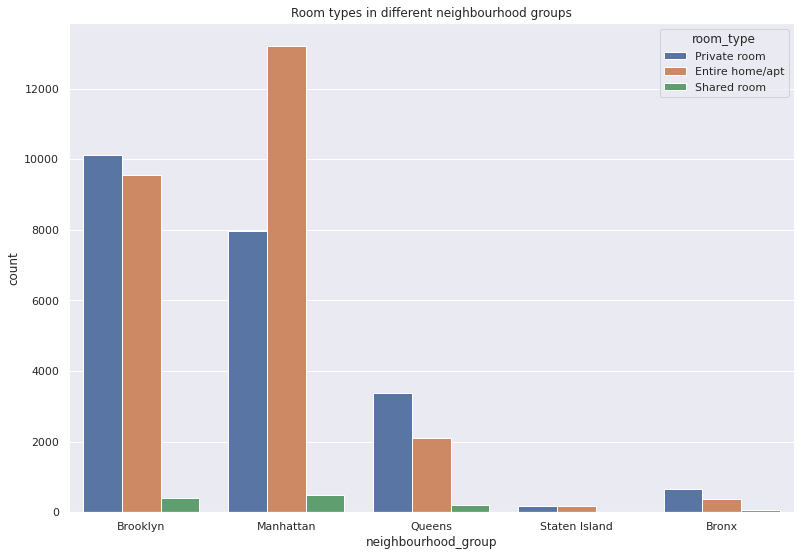

In [98]:
# room types in different neighbourhood groups
room_type_neighbourhood_groups = bnb_df.groupby(['neighbourhood_group','room_type'])['room_type'].count()
print(room_type_neighbourhood_groups)

# plot the distribution
plt.figure()
sns.countplot(bnb_df['neighbourhood_group'], hue=bnb_df['room_type'])
plt.title('Room types in different neighbourhood groups')
plt.show()

**We can see from the above graph that,**
* Brooklyn has almost similar numbers of Private Room (10126) and Entire Home/Apt (9558). 
* Manhattan has got the highest number of Entire Home/Apt (13198) and there are very few shared rooms available in all the neighbourhood groups in comparison to other room types.
* Bronx and Staten Island has got very fewer rooms than the other neighbourhood groups.

* Due to the availability of rooms in Brooklyn and Manhattan people will tend to prefer to stay in these two neighborhood groups as compared to others.

### **Which neighbourhood group people prefer to spend more nights in or prefers a long stay?**

neighbourhood_group
Manhattan        8.579409
Brooklyn         6.055486
Queens           5.181433
Staten Island    4.831099
Bronx            4.563303
Name: minimum_nights, dtype: float64


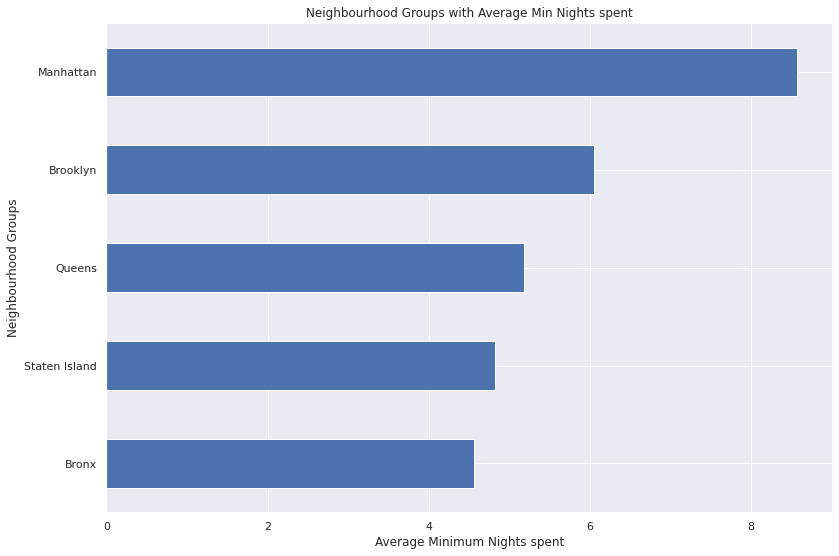

In [101]:
# minimum nights spent in different neighbourhood groups
min_nights_neighbourhood_group = bnb_df.groupby(['neighbourhood_group'])['minimum_nights'].mean().sort_values(ascending=False)
print(min_nights_neighbourhood_group)

# plot the minimum nights spent w.r.t neighbourhood groups
min_nights_neighbourhood_group.plot.barh().invert_yaxis()
plt.xlabel('Average Minimum Nights spent')
plt.ylabel('Neighbourhood Groups')
plt.title('Neighbourhood Groups with Average Min Nights spent')
plt.show()

* Most people prefer to spend more nights in Manhattan (8.5) and the least amount of nights in Bronx (4.5) on an average.
* Due to more availability of rooms in Manhattan and Brooklyn, people prefer spending more number of nights i.e prefer long stays over short stays in these two neighborhood groups as stated earlier.

### **Which neighbourhood group has got the most number of reviews in average?**

neighbourhood_group
Staten Island    30.941019
Queens           27.700318
Bronx            25.977982
Brooklyn         24.197661
Manhattan        20.986565
Name: number_of_reviews, dtype: float64


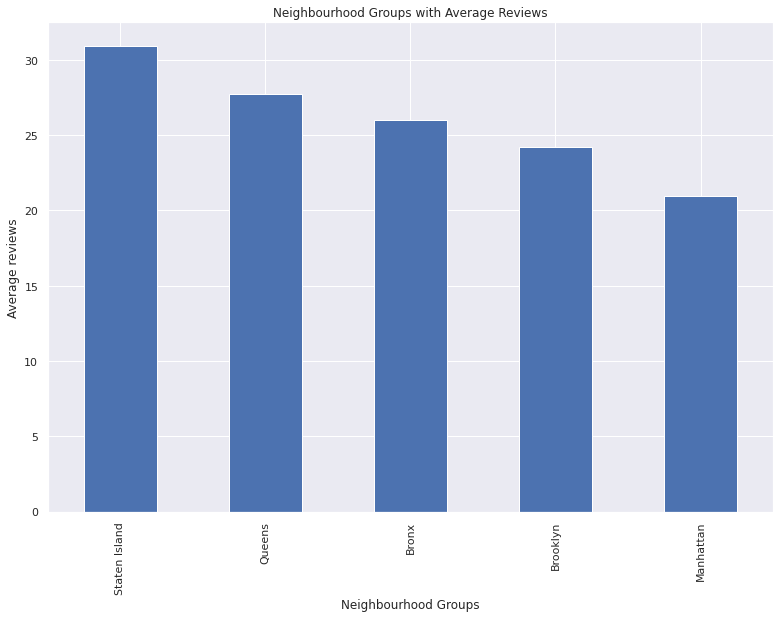

In [102]:
# top neighbourhood groups on the basis of average reviews
top_reviews_neighbourhood_group = bnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].mean().sort_values(ascending=False)
print(top_reviews_neighbourhood_group)

# plot the neighbourhood groups on the basis of average reviews
top_reviews_neighbourhood_group.plot.bar()
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Average reviews')
plt.title('Neighbourhood Groups with Average Reviews')
plt.show()

* Staten Island has got the most reviews where the number of properties listed is the least. Hence, Staten Island could be receiving more visitors as compared to others.

* Manhattan with the most properties listed has the least number of average reviews which shows less number of people visiting these Airbnbs. We can infer from the above insight of minimum nights and this that less number of people visit Manhattan airbnbs but prefers to stay for a longer time as compared to other neighborhood groups.

### **Which neighbourhood group has the most availability out of 365 days a year?**

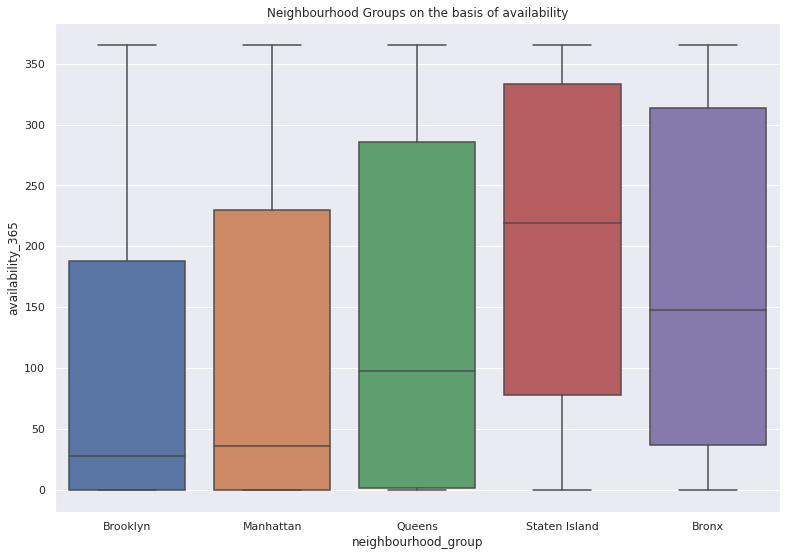

In [103]:
# top neighbourhood groups on the basis of availability
plt.figure()
plt.title('Neighbourhood Groups on the basis of availability')
sns.boxplot(data=bnb_df, x='neighbourhood_group', y='availability_365')
plt.show()

* The box plot above shows that Staten Island has the most available properties to book out of 365 days and Brooklyn has the least available properties.

## **<u>Let us have a look of the different features over the map of NYC:</u>**

### **Locations/Map of Neighbourhood Groups**

Text(0.5, 1.0, 'Locations of different neighbourhood groups in NYC over a map')

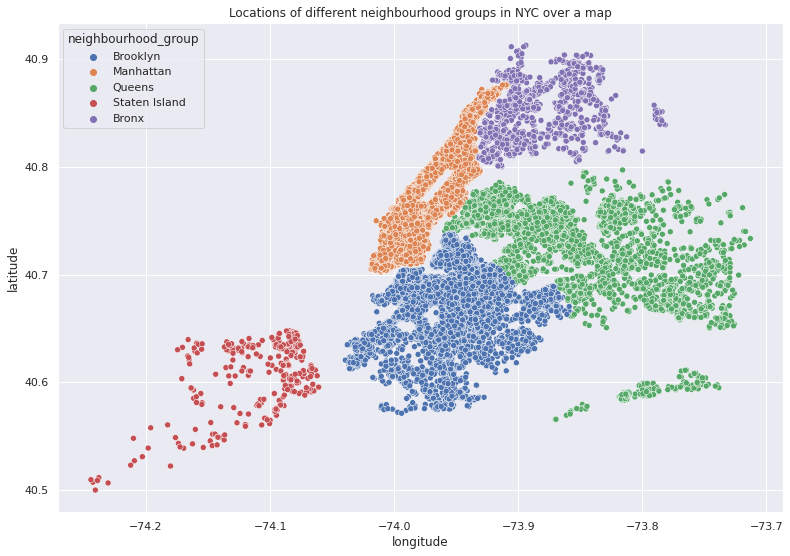

In [106]:
# plot neighbourhood groups on the basis of latitude and longitude
sns.scatterplot(bnb_df['longitude'], bnb_df['latitude'], hue='neighbourhood_group', data=bnb_df)
plt.title('Locations of different neighbourhood groups in NYC over a map')

Compared to a real image of New York City:



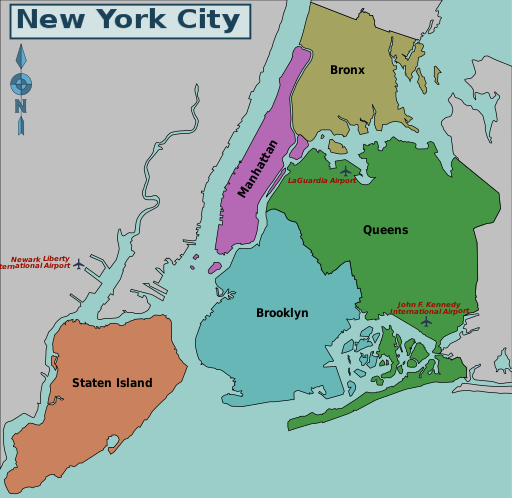

### **Room types per location of neighbourhood groups**

Text(0.5, 1.0, 'Room types in different neighbourhood groups as per location over a map')

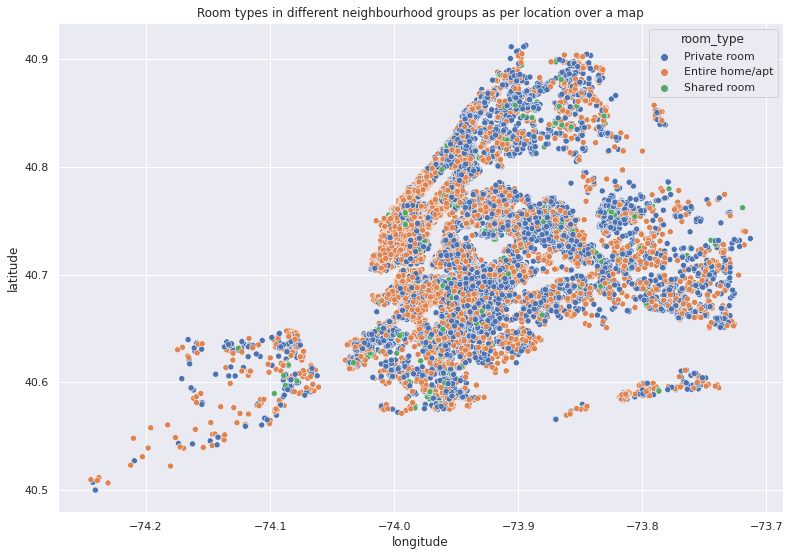

In [107]:
# plot the room types per location of neighbourhood groups
sns.scatterplot(bnb_df['longitude'], bnb_df['latitude'], hue='room_type', data=bnb_df)
plt.title('Room types in different neighbourhood groups as per location over a map')

### **Price variation across locations of neighbourhood groups**

Text(0.5, 1.0, 'Price variation across location of different neighbourhood groups')

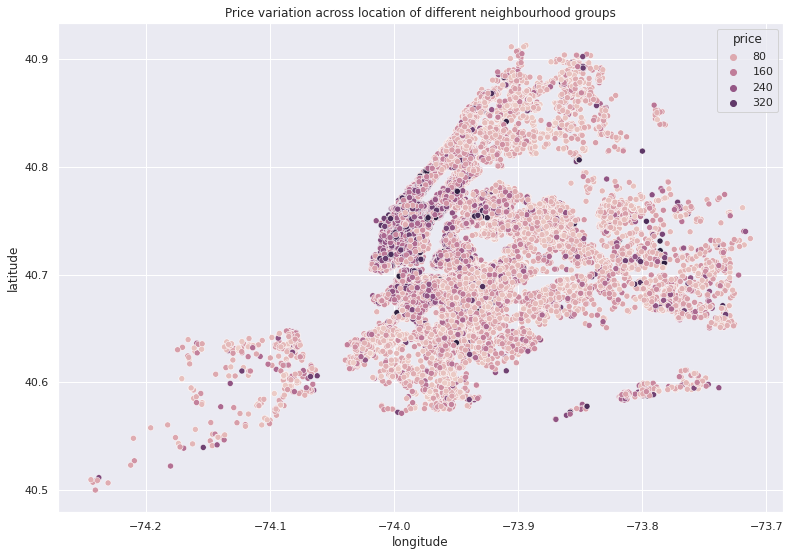

In [108]:
# plot the price variation across locations
sns.scatterplot(bnb_df['longitude'], bnb_df['latitude'], hue='price', data=bnb_df[bnb_df.price<400])
plt.title('Price variation across location of different neighbourhood groups')

As we had a few properties which are listed at a very higher price, we decided to see the price variation across neighbourhood groups where the listed price is below 400. We can clearly see that only few properties in Manhattan are costly and ranging near 400 dollars , other than that most of the properties across all neighbourhood groups are below 100 dollars.

### **Availability across different neighbourhood groups**

Text(0.5, 1.0, 'Availability across locations of different neighbourhood groups')

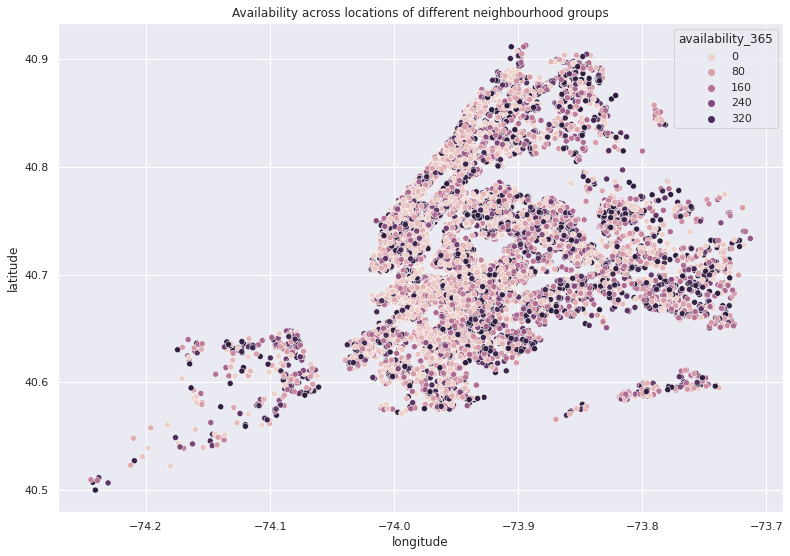

In [109]:
# plot availability across neighbourhood groups
sns.scatterplot(bnb_df['longitude'], bnb_df['latitude'], hue='availability_365', data=bnb_df)
plt.title('Availability across locations of different neighbourhood groups')

* Queens and Bronx has more availability out of 365 days a year across NYC. 
* Staten Island has many properties which are least available out of 365 days.

### **Which neighbourhoods has the most number of properties listed?**

Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


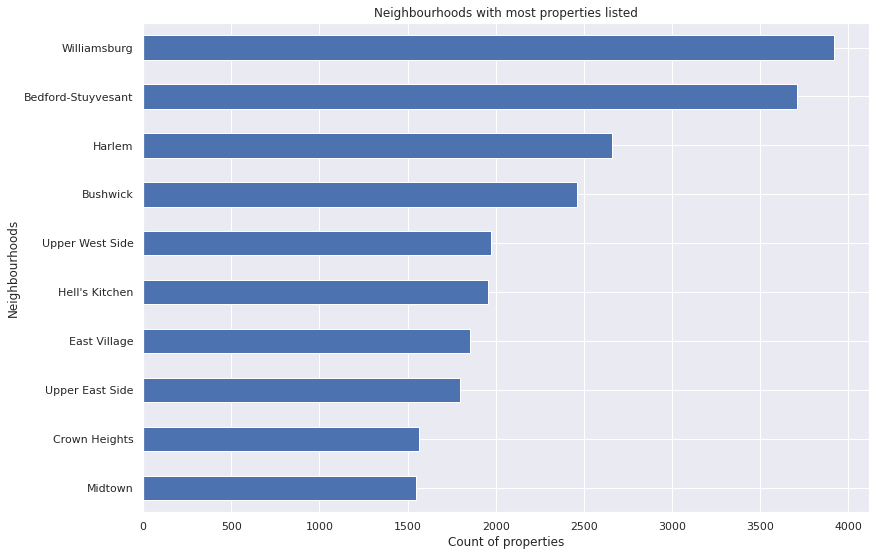

In [110]:
# top neighbourhoods on the basis of count of properties
top_10_neighbourhoods = bnb_df['neighbourhood'].value_counts().sort_values(ascending=False)[:10]
print(top_10_neighbourhoods)

# plot the top 10 neighbourhoods
top_10_neighbourhoods.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Count of properties')
plt.title('Neighbourhoods with most properties listed')
plt.show()

* Williamsburg (3919) has the most number of properties listed among all the neighbourhoods. 
* Williamsburg is in Brooklyn and we might be feeling that Brooklyn too will have the most number of properties listed among all other neighbourhood groups but this isn't true. We have seen earlier that Manhattan group has the most number of properties listed.

### **Which neighbourhoods are the most expensive and the most affordable?**

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64


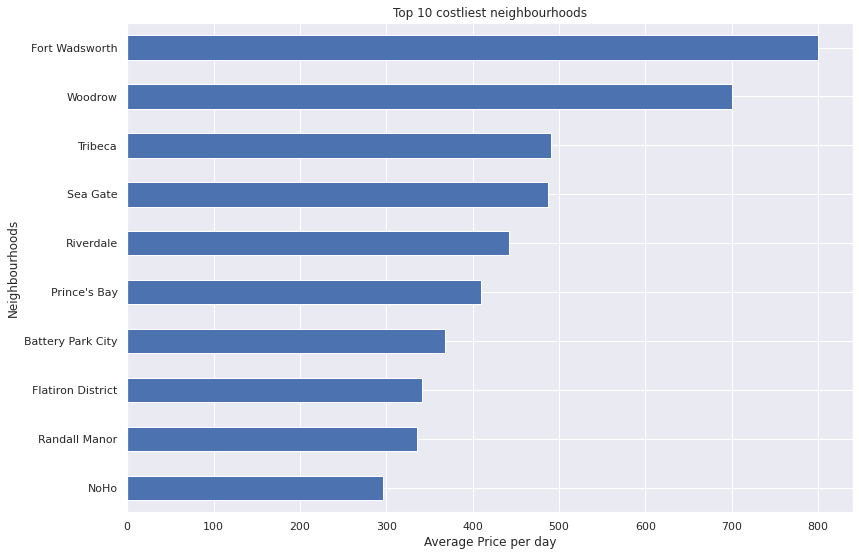

In [112]:
# find the top 10 costly neighbourhoods in NYC
high_priced_neighbourhoods = bnb_df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]
print(high_priced_neighbourhoods)

# plot the costliest neighbourhoods
high_priced_neighbourhoods.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Average Price per day')
plt.title('Top 10 costliest neighbourhoods')
plt.show()

neighbourhood
Bull's Head       47.333333
Hunts Point       50.500000
Tremont           51.545455
Soundview         53.466667
New Dorp          57.000000
Bronxdale         57.105263
New Dorp Beach    57.400000
Grant City        57.666667
Concord           58.192308
Mount Eden        58.500000
Name: price, dtype: float64


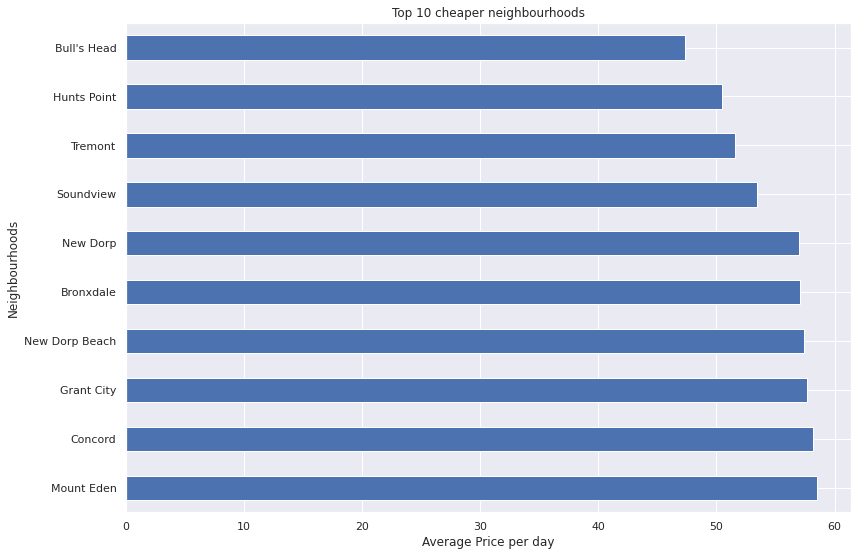

In [113]:
# find the top 10 cheaper neighbourhoods in NYC
low_priced_neighbourhoods = bnb_df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:10]
print(low_priced_neighbourhoods)

# plot the cheaper neighbourhoods
low_priced_neighbourhoods.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Average Price per day')
plt.title('Top 10 cheaper neighbourhoods')
plt.show()

* Fort Wadsworth (800) is the costliest neighborhood and Bull's Head (47.3) is the cheapest neighbourhood. 

* Interestingly, both of the neighbourhoods lie in the Staten Island group which does not happen to be the costliest or the cheapest neighbourhood group in total.

* Thus Staten Island has a variety of properties which includes some expensive ones and some affordable ones too.

### **Which neighbourhood is more preferred for longer stays or more nights?**

neighbourhood
Spuyten Duyvil                48.250000
North Riverdale               41.400000
Battery Park City             30.328571
Olinville                     23.500000
Vinegar Hill                  18.352941
Bay Terrace, Staten Island    16.500000
Mount Hope                    15.950000
Greenwich Village             15.839286
Murray Hill                   15.615702
Claremont Village             15.214286
Name: minimum_nights, dtype: float64


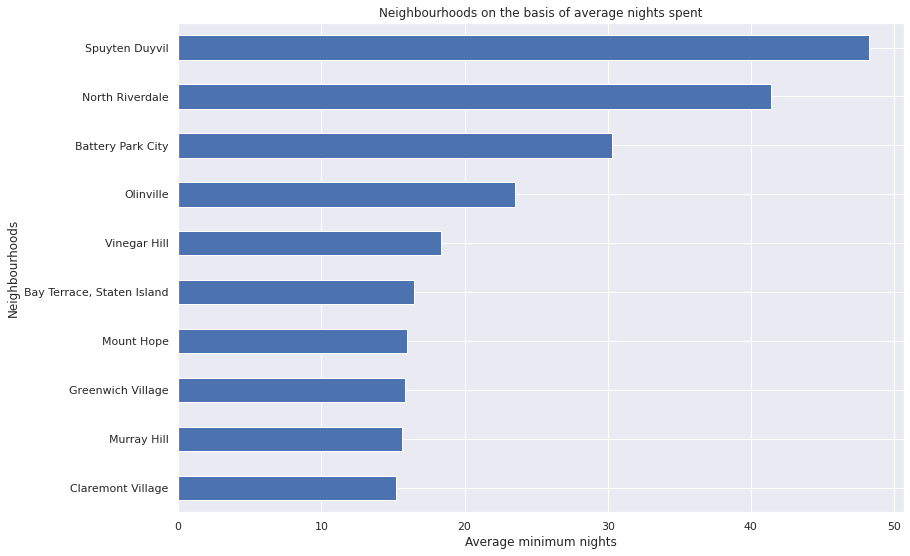

In [114]:
# top 10 neighbourhoods on the basis of average min nights
top_10_neighbourhoods_min_nights = bnb_df.groupby(['neighbourhood'])['minimum_nights'].mean().sort_values(ascending=False)[:10]
print(top_10_neighbourhoods_min_nights)

# plot the top 10 neighbourhoods where people most prefer to stay
top_10_neighbourhoods_min_nights.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Average minimum nights')
plt.title('Neighbourhoods on the basis of average nights spent')
plt.show()

* Spuyten Duyvil (48.25) is the neighbourhood with the most average minimum nights or preferred for longer stays followed by North Riverdale (41.40).

### **Which neighbourhood has got the most number of reviews in average?**

neighbourhood
Silver Lake            118.500000
East Elmhurst           81.659459
Richmondtown            79.000000
Eltingville             76.000000
Mount Eden              70.000000
Springfield Gardens     69.094118
Tompkinsville           57.142857
Huguenot                55.666667
Manhattan Beach         50.625000
Highbridge              48.814815
Name: number_of_reviews, dtype: float64


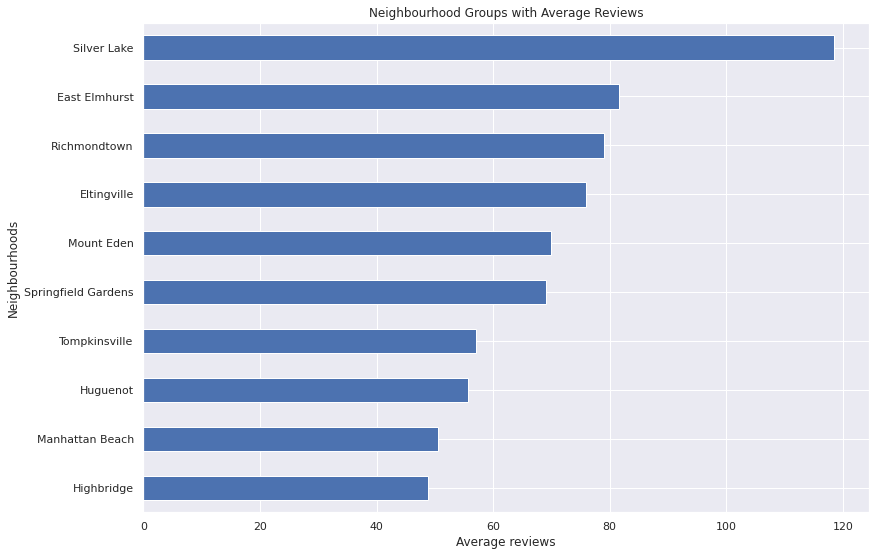

In [128]:
# top 10 neighbourhoods on the basis of average reviews
top_reviews_neighbourhood = bnb_df.groupby(['neighbourhood'])['number_of_reviews'].mean().sort_values(ascending=False)[:10]
print(top_reviews_neighbourhood)

# plot the neighbourhood groups on the basis of average reviews
top_reviews_neighbourhood.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Average reviews')
plt.title('Neighbourhood Groups with Average Reviews')
plt.show()

### **Which neighbourhoods are the most available or less occupied?**

neighbourhood
Fort Wadsworth    365.000000
Co-op City        364.000000
Willowbrook       351.000000
Eastchester       333.461538
Richmondtown      300.000000
Mill Basin        290.000000
Edgemere          275.272727
Randall Manor     275.210526
West Brighton     274.722222
Spuyten Duyvil    270.000000
Name: availability_365, dtype: float64


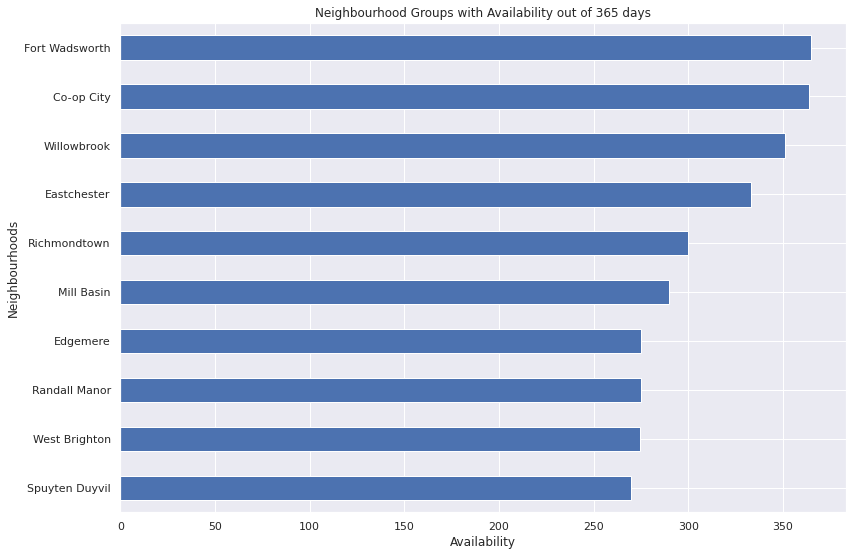

In [129]:
# top neighbourhoods on the basis of availability
top_available_neighborhood = bnb_df.groupby(['neighbourhood'])['availability_365'].mean().sort_values(ascending=False)[:10]
print(top_available_neighborhood)

top_available_neighborhood.plot.barh().invert_yaxis()
plt.ylabel('Neighbourhoods')
plt.xlabel('Availability')
plt.title('Neighbourhood Groups with Availability out of 365 days')
plt.show()

## **<u>Let us find some insights about the Room Types available in NYC:</u>**

### **How many room types are available in NYC?**

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64


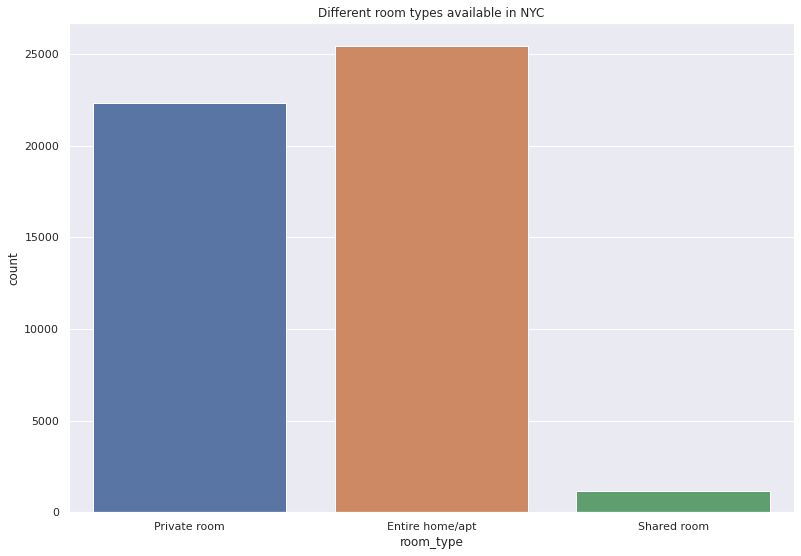

In [131]:
# room types available on the basis of count of properties
room_types = bnb_df['room_type'].value_counts()
print(room_types)

# plot the top neighbourhood groups with the count of properties
plt.title('Different room types available in NYC')
sns.countplot(bnb_df['room_type'])
plt.show()

### **Which room type is the most expensive and the most affordable one?**

room_type
Entire home/apt    211.810918
Private room        89.809131
Shared room         70.248705
Name: price, dtype: float64


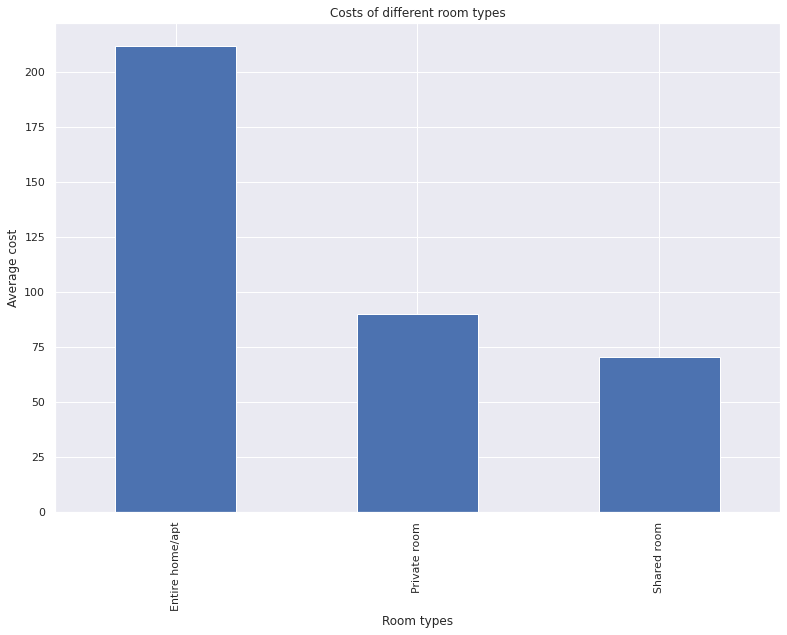

In [134]:
# top expensive and affordable room types
room_costs = bnb_df.groupby(['room_type'])['price'].mean().sort_values(ascending=False)
print(room_costs)

# plot the costs of different room types
room_costs.plot.bar()
plt.title('Costs of different room types')
plt.xlabel('Room types')
plt.ylabel('Average cost')
plt.show()

### **Which room type is preferred for longer stays?**

room_type
Entire home/apt    8.507262
Shared room        6.434370
Private room       5.379004
Name: minimum_nights, dtype: float64


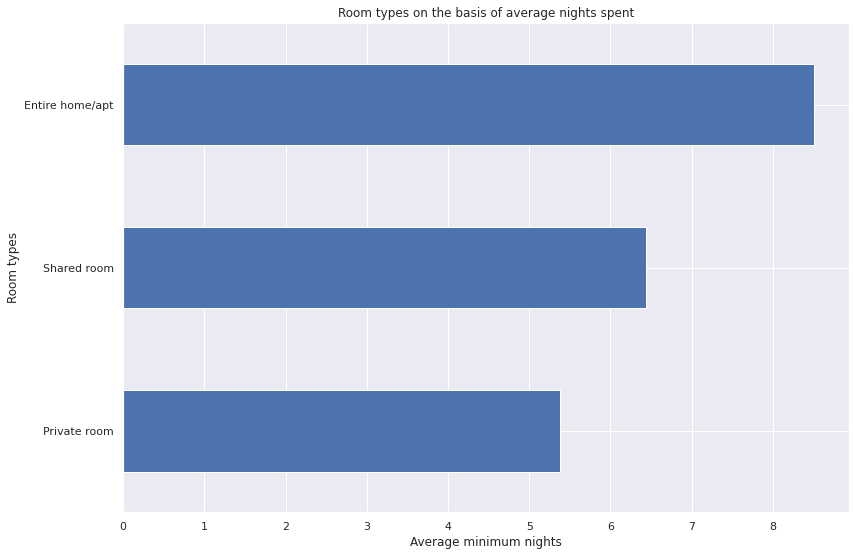

In [136]:
# top room types on the basis of average min nights
long_stay_rooms = bnb_df.groupby(['room_type'])['minimum_nights'].mean().sort_values(ascending=False)
print(long_stay_rooms)

# plot the top 10 neighbourhoods where people most prefer to stay
long_stay_rooms.plot.barh().invert_yaxis()
plt.ylabel('Room types')
plt.xlabel('Average minimum nights')
plt.title('Room types on the basis of average nights spent')
plt.show()

### **Which room type has got the most number of reviews in average?**

room_type
Private room       24.104082
Entire home/apt    22.844098
Shared room        16.622625
Name: number_of_reviews, dtype: float64


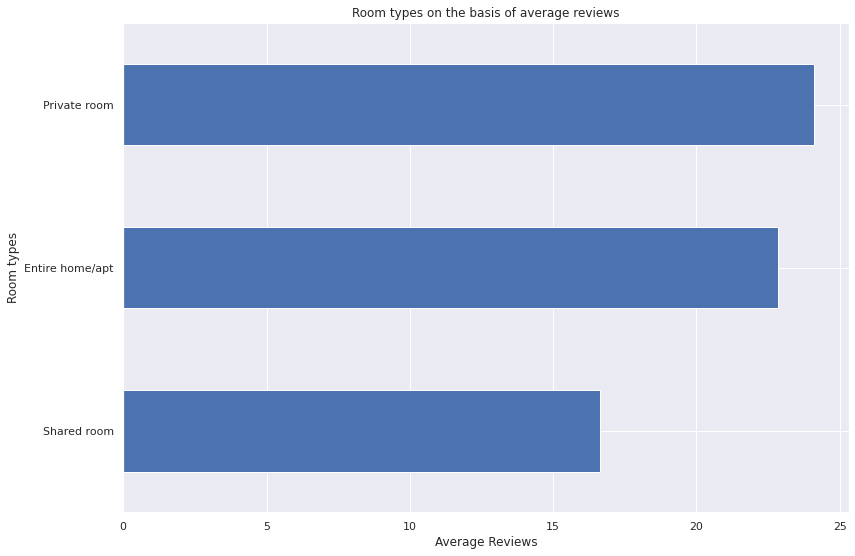

In [140]:
# top room types according to the no. of reviews
top_review_rooms = bnb_df.groupby(['room_type'])['number_of_reviews'].mean().sort_values(ascending=False)
print(top_review_rooms)

# plot the top 10 neighbourhoods where people most prefer to stay
top_review_rooms.plot.barh().invert_yaxis()
plt.ylabel('Room types')
plt.xlabel('Average Reviews')
plt.title('Room types on the basis of average reviews')
plt.show()

### **Which room type is more available or less occupied out of 365 days?**

room_type
Shared room        161.873057
Entire home/apt    111.926241
Private room       111.203638
Name: availability_365, dtype: float64


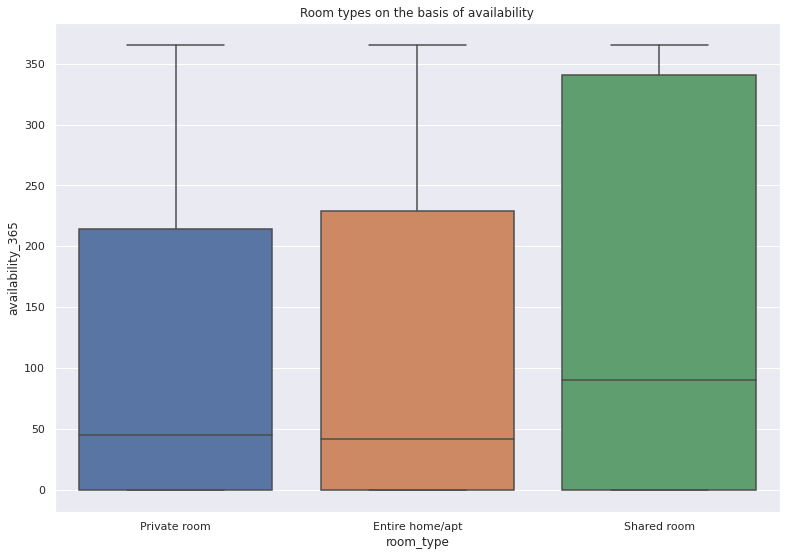

In [142]:
# availability of room types
available_rooms = bnb_df.groupby(['room_type'])['availability_365'].mean().sort_values(ascending=False)
print(available_rooms)

# room types on the basis of availability
plt.figure()
plt.title('Room types on the basis of availability')
sns.boxplot(data=bnb_df, x='room_type', y='availability_365')
plt.show()